In [1]:
import torch
import numpy as np
from sbi_particle_physics.objects.model import Model
from sbi_particle_physics.managers.plotter import Plotter
from sbi_particle_physics.managers.backup import Backup
from sbi_particle_physics.managers.model_diagnostics import ModelDiagnostics
from sbi_particle_physics.config import MODELS_DIR, DATA_DIR

In [2]:
model = Backup.load_model_for_inference_basic(directory=MODELS_DIR / "training_15", device=torch.device("cpu"))

Model loaded from /home/hep/nrc25/sbi-particle-physics/models/training_15/epoch_1064.pt


In [3]:
files = Backup.detect_files(DATA_DIR / "data_3")[-5:] # 5 last files
raw_data, raw_parameters, _ = Backup.load_data(files, model.device)
raw_data = raw_data[:,:model.n_points]
raw_parameters = raw_parameters[:,:model.n_points]
data = model.normalizer.normalize_data(raw_data)
parameters = model.normalizer.normalize_parameters(raw_parameters)

Loading files:   0%|          | 0/5 [00:00<?, ?it/s]

Sampling 200 times (1000,) posterior samples.: 100%|██████████| 200/200 [00:22<00:00,  8.99it/s]


Calculating ranks for 200 SBC samples:   0%|          | 0/200 [00:00<?, ?it/s]

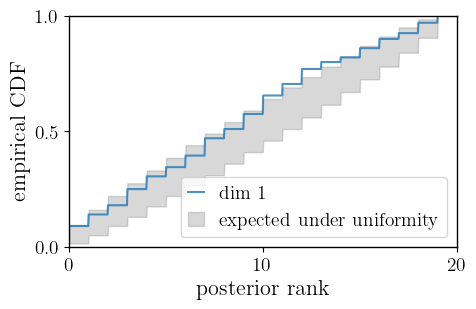

In [4]:
ModelDiagnostics.simulation_based_calibration(model, data[:200], parameters[:200], num_posterior_samples=1000)

Sampling 200 times (1000,) posterior samples.: 100%|██████████| 200/200 [00:10<00:00, 18.58it/s]


Calculating ranks for 200 SBC samples:   0%|          | 0/200 [00:00<?, ?it/s]

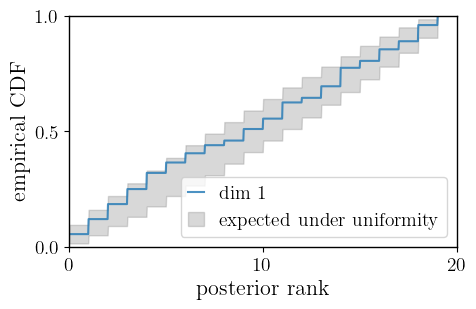

In [5]:
ModelDiagnostics.expected_coverage_test(model, data[:200], parameters[:200], num_posterior_samples=1000)

Sampling 200 times (1000,) posterior samples.: 100%|██████████| 200/200 [00:11<00:00, 18.10it/s]


-0.7759993076324463 Should be close to 0
0.8234535171851342 Should be larger than 0.05


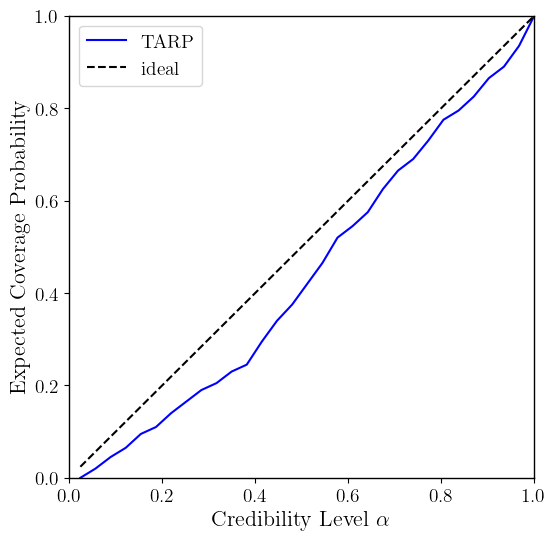

In [6]:
ModelDiagnostics.tarp_test(model, data[:200], parameters[:200], num_posterior_samples=1000)

 Training neural network. Epochs trained: 256p-value: 0.9355, Reject H0 (misspecified): False


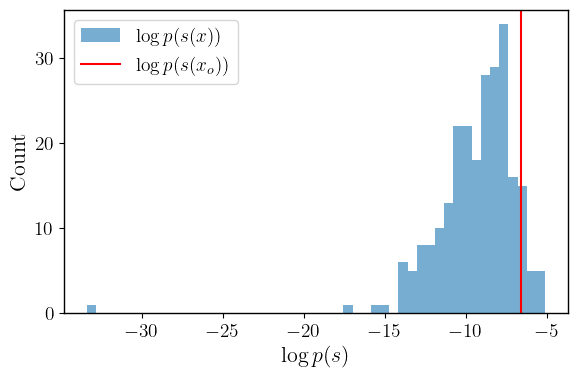

In [7]:
ModelDiagnostics.misspecification_test(model, data[-1002:-2], x_o=data[-1])

MMD p-value: 0.14900000000000002


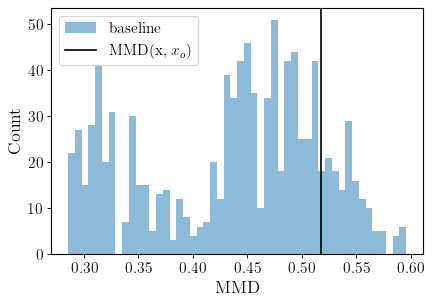

In [8]:
ModelDiagnostics.misspecification_test_mmd(model, data[-1002:-2], x_o=data[-1])
# only needs to be between 0.2->0.8 (model is wrong if <0.05)

Simulating samples:   0%|          | 0/1 [00:00<?, ?it/s]

/home/hep/nrc25/miniconda3/envs/mlhep/lib/python3.12/site-packages/eos/signal_pdf.py:71: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  log_proposal = pypmc.density.gauss.LocalGauss(sigma)


Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

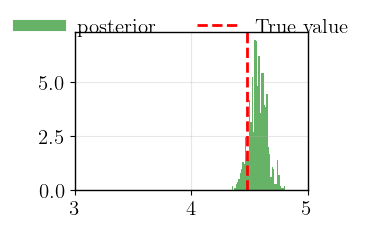

In [4]:
ModelDiagnostics.many_posteriors(model, parameter_component_index=0, x_min=3, x_max=5) # component 0 of the parameters (C_9)

  0%|          | 0/2 [00:00<?, ?it/s]

A  torch.Size([2, 1])


Simulating samples:   0%|          | 0/2 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]

Main run:   0%|          | 0/100 [00:00<?, ?it/s]

B torch.Size([2, 4000, 5])
C torch.Size([2, 4000, 5])
xpp sjape torch.Size([2, 4000, 5])
thetapp shape torch.Size([2, 1])


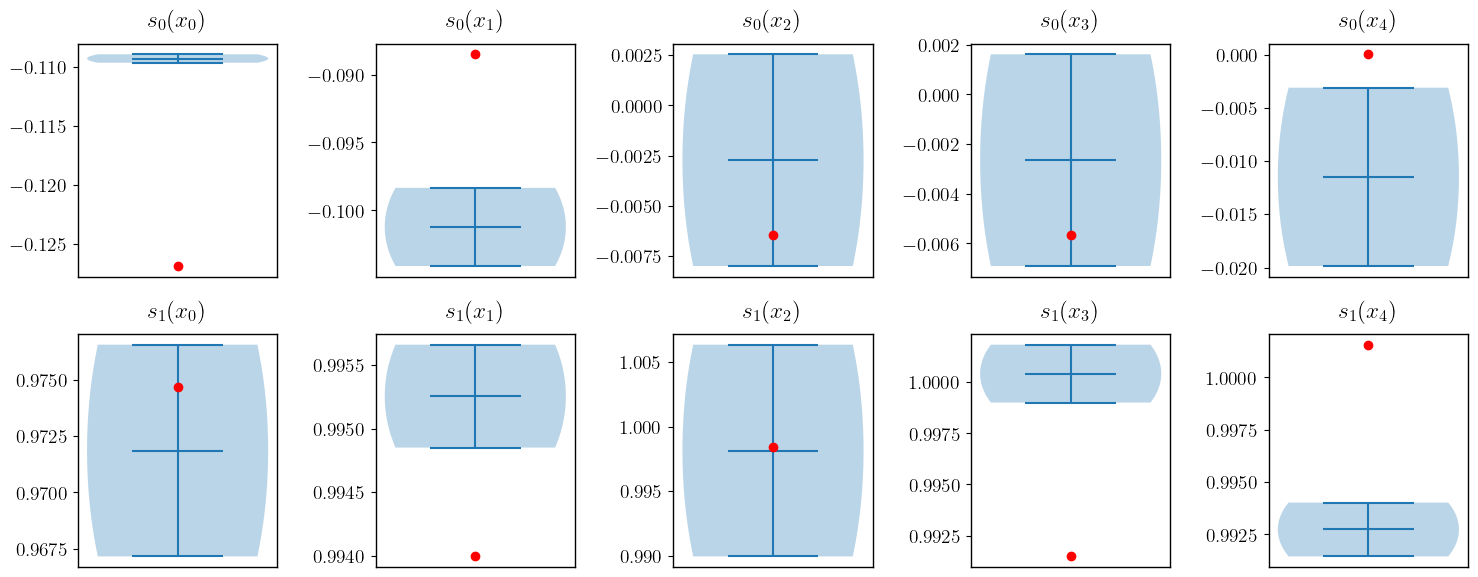

In [5]:
ModelDiagnostics.posterior_predictive_checks(model, x_o=data[-1], n_samples=2, n_points=model.n_points)

/home/hep/nrc25/sbi-particle-physics/src/sbi_particle_physics/objects/model.py:222: UserWarning: Capping max_sampling_batch_size from 10000 to 1000 to avoid excessive memory usage.
  return self.posterior.sample_batched((n_parameters,), x=observed_samples).transpose(0,1) # sbi gives it in a weird order


Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

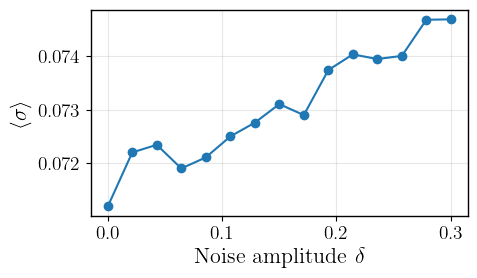

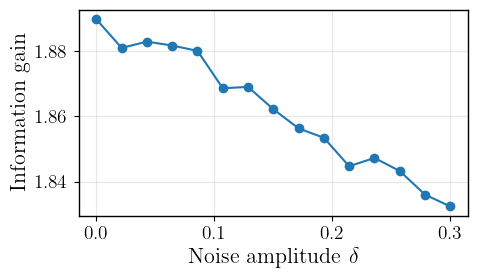

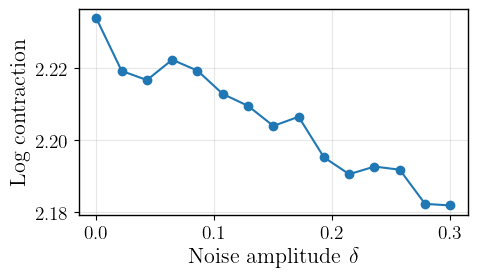

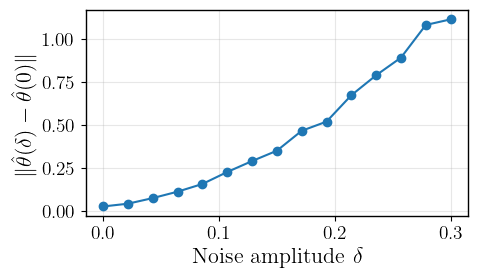

=== Robustness to noise summary ===
δ=0.00 | width=7.120e-02 | IG=1.890 | logC=2.234 | drift=2.847e-02
δ=0.02 | width=7.221e-02 | IG=1.881 | logC=2.219 | drift=4.452e-02
δ=0.04 | width=7.235e-02 | IG=1.883 | logC=2.217 | drift=7.706e-02
δ=0.06 | width=7.191e-02 | IG=1.882 | logC=2.222 | drift=1.142e-01
δ=0.09 | width=7.211e-02 | IG=1.880 | logC=2.219 | drift=1.588e-01
δ=0.11 | width=7.250e-02 | IG=1.869 | logC=2.213 | drift=2.282e-01
δ=0.13 | width=7.276e-02 | IG=1.869 | logC=2.210 | drift=2.915e-01
δ=0.15 | width=7.311e-02 | IG=1.862 | logC=2.204 | drift=3.515e-01
δ=0.17 | width=7.290e-02 | IG=1.856 | logC=2.207 | drift=4.669e-01
δ=0.19 | width=7.374e-02 | IG=1.853 | logC=2.195 | drift=5.200e-01
δ=0.21 | width=7.403e-02 | IG=1.845 | logC=2.191 | drift=6.729e-01
δ=0.24 | width=7.395e-02 | IG=1.847 | logC=2.193 | drift=7.887e-01
δ=0.26 | width=7.401e-02 | IG=1.843 | logC=2.192 | drift=8.909e-01
δ=0.28 | width=7.468e-02 | IG=1.836 | logC=2.182 | drift=1.080e+00
δ=0.30 | width=7.469e-02 |

In [4]:
n_posterior_samples = 1000
deltas = np.linspace(0.0, 0.3, 15).tolist()
ModelDiagnostics.robustness_to_noise(model, x_o_raw=raw_data[-100:], n_posterior_samples=n_posterior_samples, deltas=deltas)

/home/hep/nrc25/sbi-particle-physics/src/sbi_particle_physics/objects/model.py:222: UserWarning: Capping max_sampling_batch_size from 10000 to 1000 to avoid excessive memory usage.
  return self.posterior.sample_batched((n_parameters,), x=observed_samples).transpose(0,1) # sbi gives it in a weird order


Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

Drawing 1000 samples for 100 observations:   0%|          | 0/1000 [00:00<?, ?it/s]

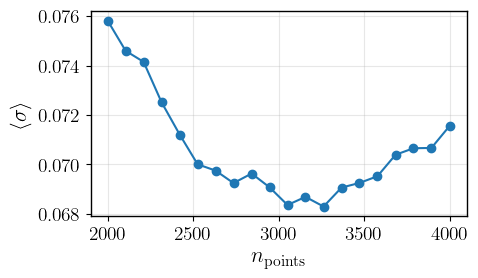

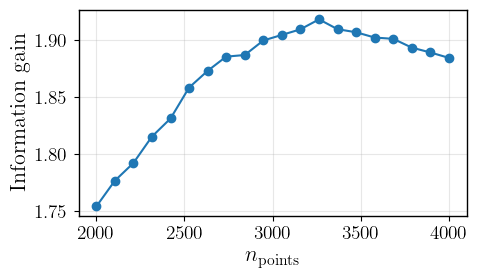

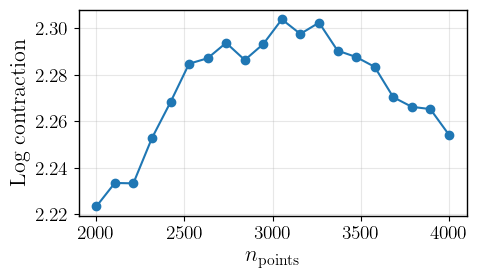

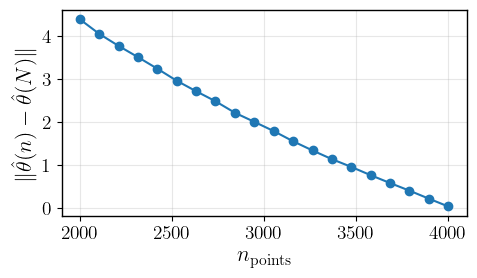

=== Robustness to n_points summary ===
n=4000 | width=7.155e-02 | IG=1.884 | logC=2.254 | drift=3.284e-02
n=3894 | width=7.067e-02 | IG=1.889 | logC=2.265 | drift=2.167e-01
n=3789 | width=7.065e-02 | IG=1.893 | logC=2.266 | drift=4.024e-01
n=3684 | width=7.039e-02 | IG=1.901 | logC=2.270 | drift=5.801e-01
n=3578 | width=6.952e-02 | IG=1.902 | logC=2.283 | drift=7.643e-01
n=3473 | width=6.925e-02 | IG=1.907 | logC=2.288 | drift=9.574e-01
n=3368 | width=6.906e-02 | IG=1.909 | logC=2.290 | drift=1.138e+00
n=3263 | width=6.829e-02 | IG=1.918 | logC=2.302 | drift=1.340e+00
n=3157 | width=6.869e-02 | IG=1.909 | logC=2.298 | drift=1.556e+00
n=3052 | width=6.836e-02 | IG=1.904 | logC=2.304 | drift=1.793e+00
n=2947 | width=6.907e-02 | IG=1.899 | logC=2.293 | drift=2.007e+00
n=2842 | width=6.963e-02 | IG=1.887 | logC=2.286 | drift=2.218e+00
n=2736 | width=6.924e-02 | IG=1.885 | logC=2.294 | drift=2.489e+00
n=2631 | width=6.975e-02 | IG=1.873 | logC=2.287 | drift=2.722e+00
n=2526 | width=7.000e-0

In [5]:
n_posterior_samples = 1000
ModelDiagnostics.robustness_to_npoints(model, x_o_raw=raw_data[-100:], n_posterior_samples=n_posterior_samples, use_random_subsample=False, number_of_ns=20)